<a href="https://colab.research.google.com/github/marefuabebe/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/Titanic_Full_Data_Cleaning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
url = "https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv"
df = pd.read_csv(url)

In [ ]:

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


In [ ]:
# Summary statistics
df.describe(include="all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,909.000000,909.000000,909,909,909,710.000000,909.000000,909.000000,909,891.000000,208,907
unique,NaN,NaN,4,892,7,NaN,NaN,NaN,681,NaN,147,9
top,NaN,NaN,3,"Harper, Miss. Annie Jessie ""Nina""",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,490,2,537,NaN,NaN,NaN,7,NaN,4,600
mean,446.040704,0.387239,NaN,NaN,NaN,29.603169,0.522552,0.380638,NaN,31.431149,NaN,NaN
std,257.212740,0.487387,NaN,NaN,NaN,14.566894,1.098050,0.802185,NaN,46.797866,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,224.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,445.000000,0.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,669.000000,1.000000,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,30.847900,NaN,NaN


In [ ]:
# Check missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


In [ ]:
# Check duplicates
df.duplicated().sum()



np.int64(10)

In [ ]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"], inplace=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,Female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)



/tmp/ipython-input-2750842681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2750842681.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df['Sex'] = df['Sex'].str.lower()
df['Embarked'] = df['Embarked'].str.upper()


In [ ]:
df['Sex'] = df['Sex'].str.lower()
df['Embarked'] = df['Embarked'].str.upper()






In [ ]:
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = df[col].clip(lower, upper)

remove_outliers('Age')
remove_outliers('Fare')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [ ]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  909 non-null    int64  
 1   Pclass    909 non-null    object 
 2   Sex       909 non-null    int64  
 3   Age       909 non-null    float64
 4   SibSp     909 non-null    int64  
 5   Parch     909 non-null    int64  
 6   Fare      909 non-null    float64
 7   Embarked  909 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 56.9+ KB


,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.387239,0.682068,28.934543,0.522552,0.380638,23.554460,3.253025
std,0.487387,0.525891,11.952013,1.098050,0.802185,19.868548,1.310666
min,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,7.925000,3.000000
50%,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200,4.000000
75%,1.000000,1.000000,35.000000,1.000000,0.000000,30.500000,4.000000
max,1.000000,2.000000,54.500000,8.000000,6.000000,64.362500,5.000000


In [57]:
df.to_csv("titanic_cleaned.csv", index=False)
print(" File saved locally as titanic_cleaned.csv")



 File saved locally as titanic_cleaned.csv


## Evaluate Model Performance: Accuracy, Precision, Recall, and F1-Score

Beyond the confusion matrix, several metrics provide a more quantitative assessment of a classification model's performance. We will calculate and display the following:

*   **Accuracy**: The proportion of correctly classified instances out of the total instances.
*   **Precision**: The proportion of true positive predictions among all positive predictions.
*   **Recall (Sensitivity)**: The proportion of true positive predictions among all actual positive instances.
*   **F1-Score**: The harmonic mean of precision and recall, providing a balanced measure.

In [58]:


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7637
Precision: 0.7857
Recall: 0.6627
F1-Score: 0.7190


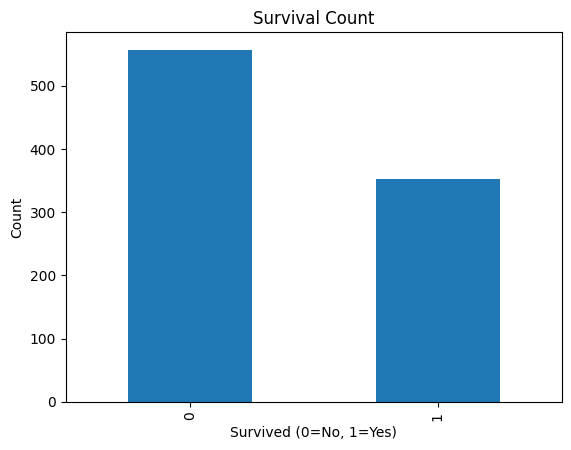

In [ ]:
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

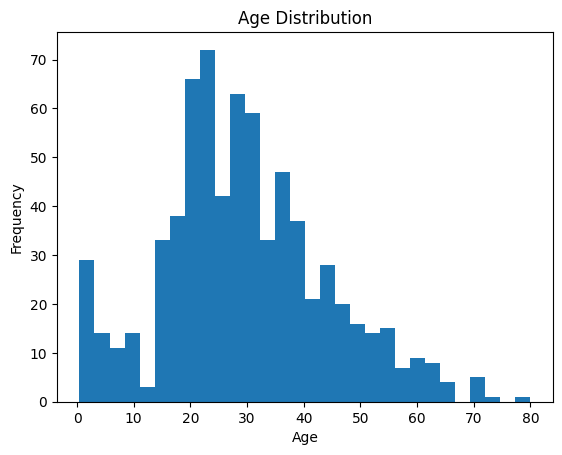

In [ ]:
df['Age'].plot(kind='hist', bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


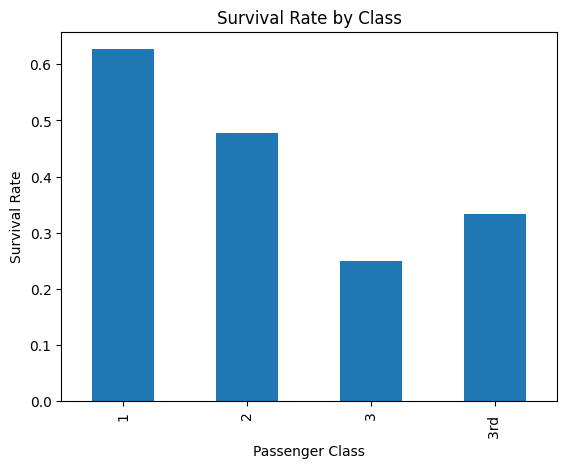

In [ ]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


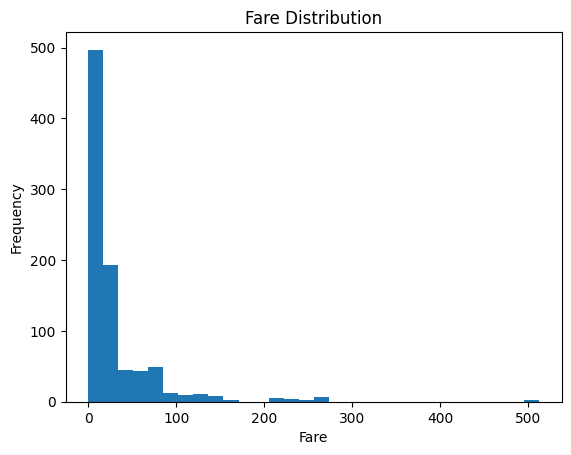

In [ ]:
df['Fare'].plot(kind='hist', bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()


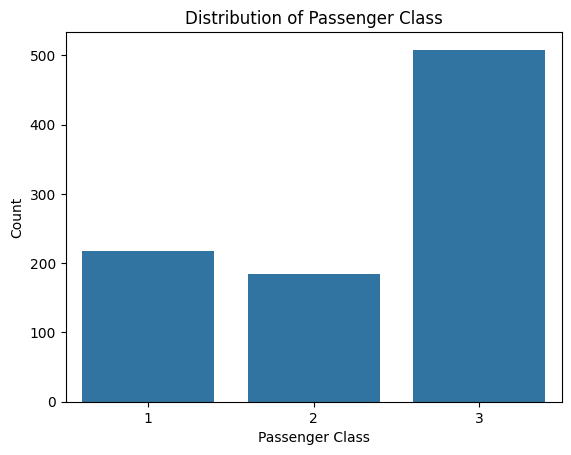

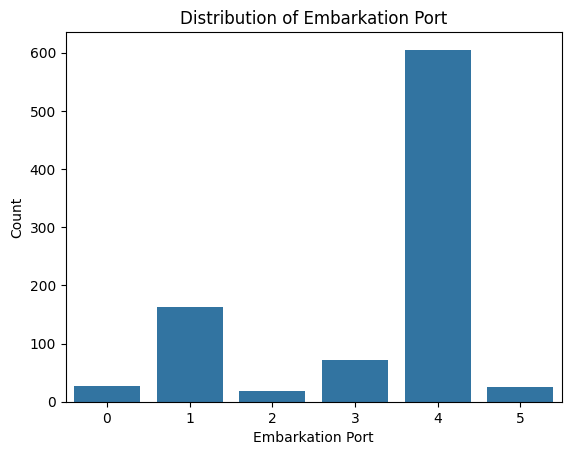

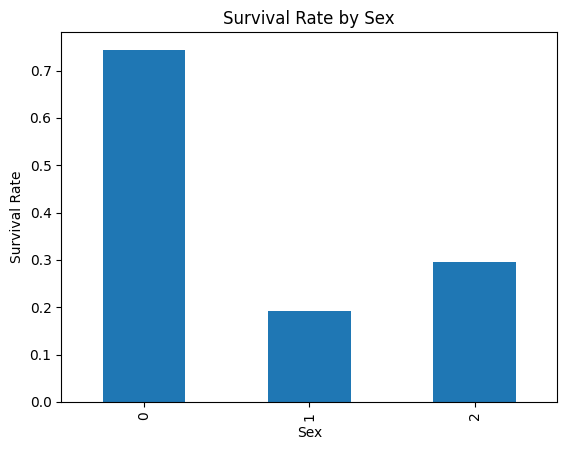

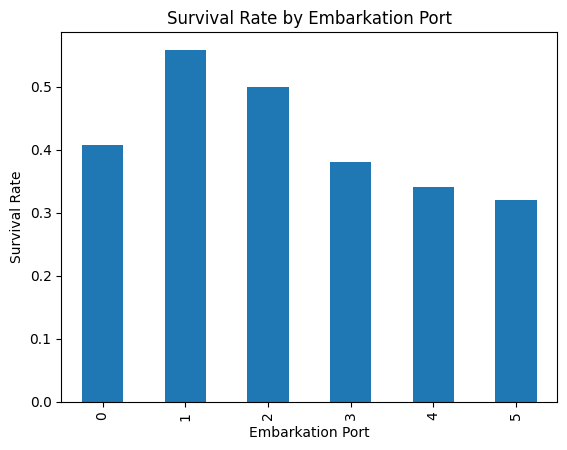

In [27]:
# Outlier treatment
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Use .loc to modify DataFrame and avoid SettingWithCopyWarning
    df.loc[:, col] = df[col].clip(lower, upper)

remove_outliers('Age')
remove_outliers('Fare')

# Encoding Categorical Features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# 1. Generate count plot for Pclass
sns.countplot(x='Pclass', data=df)
plt.title("Distribution of Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# 2. Generate count plot for Embarked
sns.countplot(x='Embarked', data=df)
plt.title("Distribution of Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.show()

# 3. Calculate and plot survival rate by Sex
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean()
survival_rate_by_sex.plot(kind='bar')
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

# 4. Calculate and plot survival rate by Embarked
survival_rate_by_embarked = df.groupby('Embarked')['Survived'].mean()
survival_rate_by_embarked.plot(kind='bar')
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()

/tmp/ipython-input-1798642994.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pclass'].fillna(df['Pclass'].mode()[0], inplace=True)


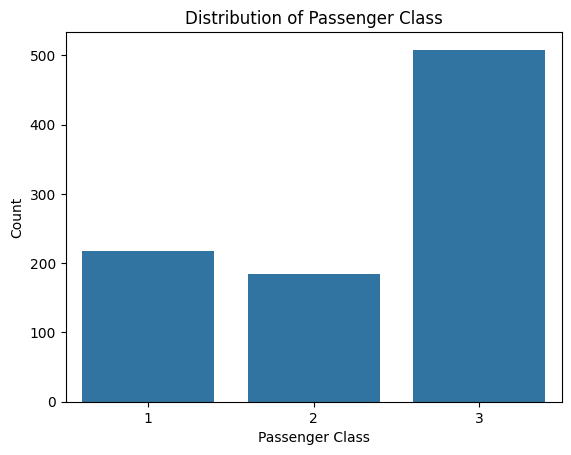

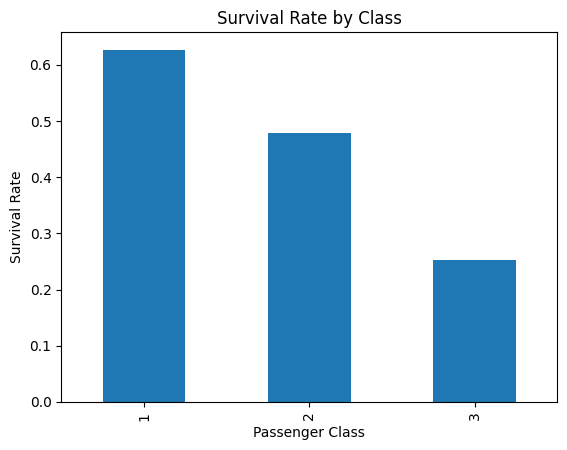

In [28]:
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')

# Filling any NaN values that might result from coercion with the mode
df['Pclass'].fillna(df['Pclass'].mode()[0], inplace=True)

# Ensure Pclass is integer type after conversion and filling
df['Pclass'] = df['Pclass'].astype(int)

# Generate a count plot for Pclass
sns.countplot(x='Pclass', data=df)
plt.title("Distribution of Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# Calculate and plot survival rate by Pclass
survival_rate_by_pclass = df.groupby('Pclass')['Survived'].mean()
survival_rate_by_pclass.plot(kind='bar')
plt.title("Survival Rate by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

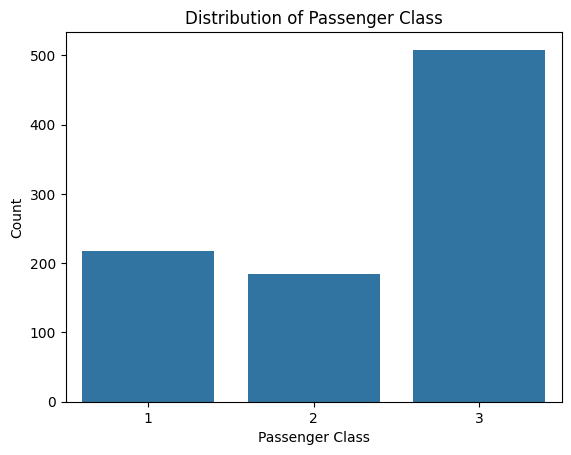

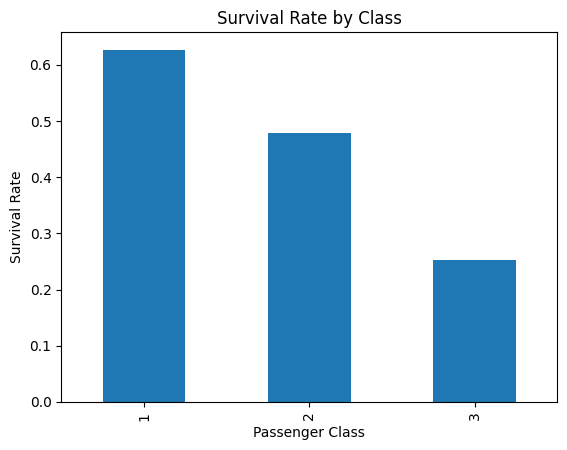

In [29]:
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')

# Filling any NaN values that might result from coercion with the mode
df['Pclass'] = df['Pclass'].fillna(df['Pclass'].mode()[0])

# Ensure Pclass is integer type after conversion and filling
df['Pclass'] = df['Pclass'].astype(int)

# Generate a count plot for Pclass
sns.countplot(x='Pclass', data=df)
plt.title("Distribution of Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# Calculate and plot survival rate by Pclass
survival_rate_by_pclass = df.groupby('Pclass')['Survived'].mean()
survival_rate_by_pclass.plot(kind='bar')
plt.title("Survival Rate by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

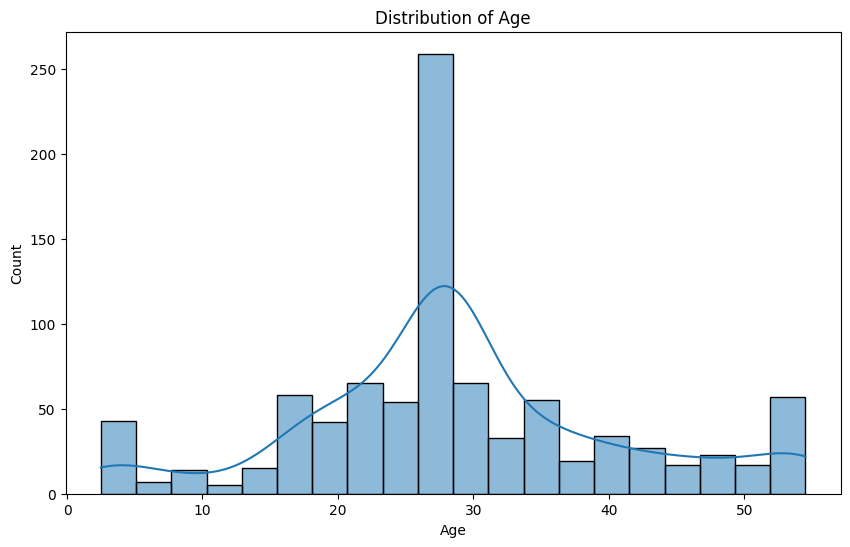

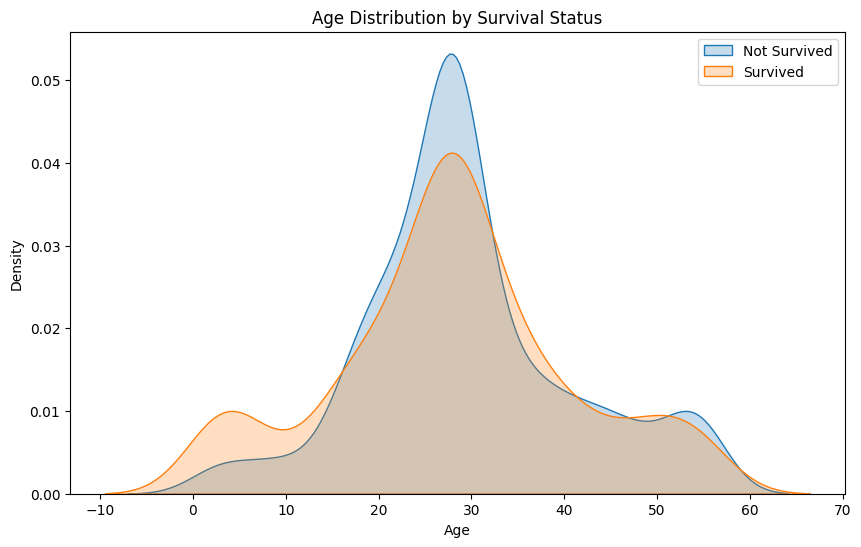

In [30]:


# 1. For the 'Age' column:
# a. Create a histogram or KDE plot to visualize its distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# b. Create a KDE plot to show the distribution of 'Age' for both 'Survived' (1) and 'Not Survived' (0) passengers, on the same plot.
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', fill=True)
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', fill=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

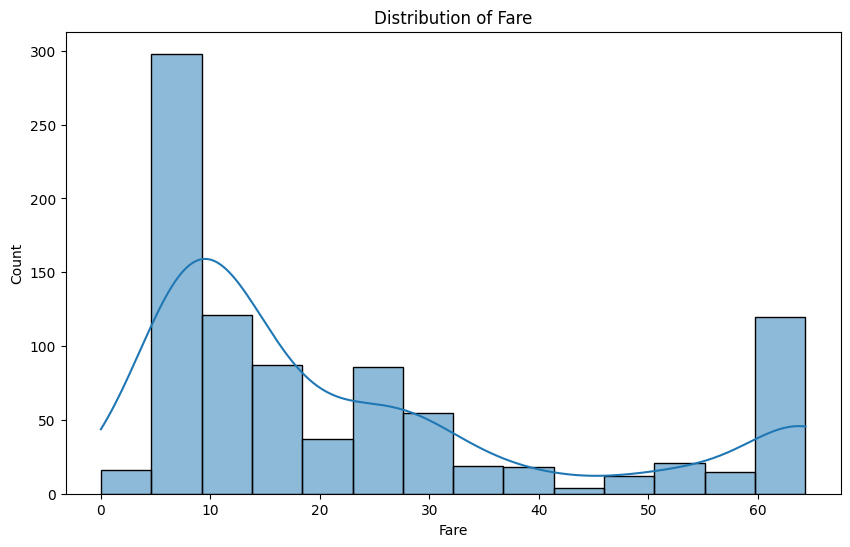

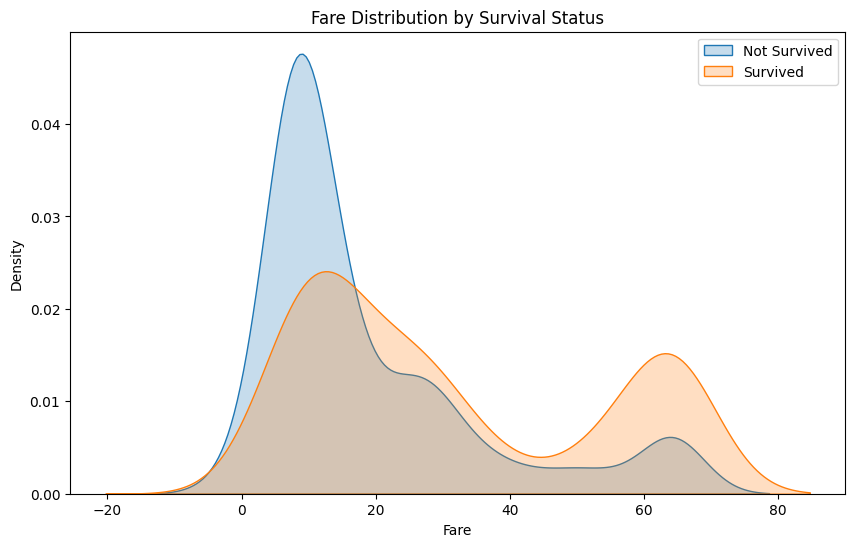

In [31]:


# 2. For the 'Fare' column:
# a. Create a histogram or KDE plot to visualize its distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# b. Create a KDE plot to show the distribution of 'Fare' for both 'Survived' (1) and 'Not Survived' (0) passengers, on the same plot.
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 0]['Fare'], label='Not Survived', fill=True)
sns.kdeplot(df[df['Survived'] == 1]['Fare'], label='Survived', fill=True)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

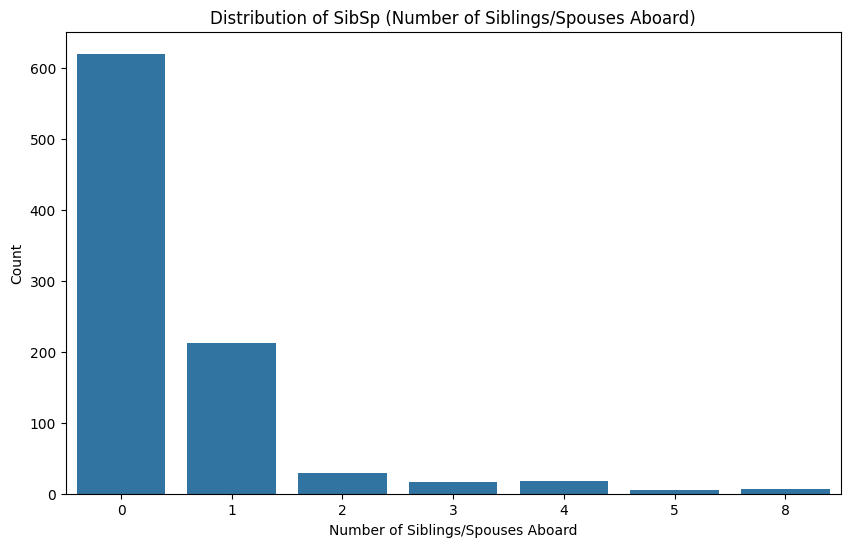

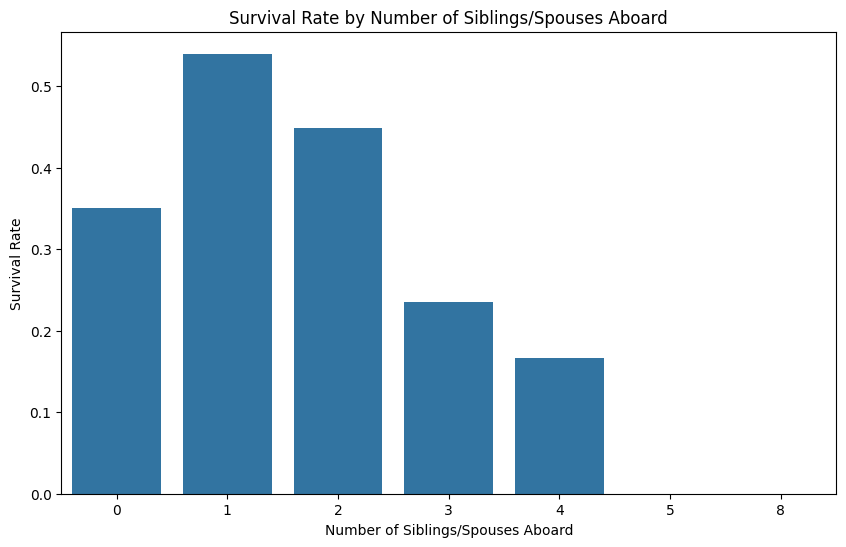

In [32]:


# 3. For the 'SibSp' column:
# a. Create a count plot to visualize its distribution.
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', data=df)
plt.title('Distribution of SibSp (Number of Siblings/Spouses Aboard)')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.show()

# b. Create a bar plot to show the survival rate grouped by 'SibSp'.
survival_rate_by_sibsp = df.groupby('SibSp')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='SibSp', y='Survived', data=survival_rate_by_sibsp)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()

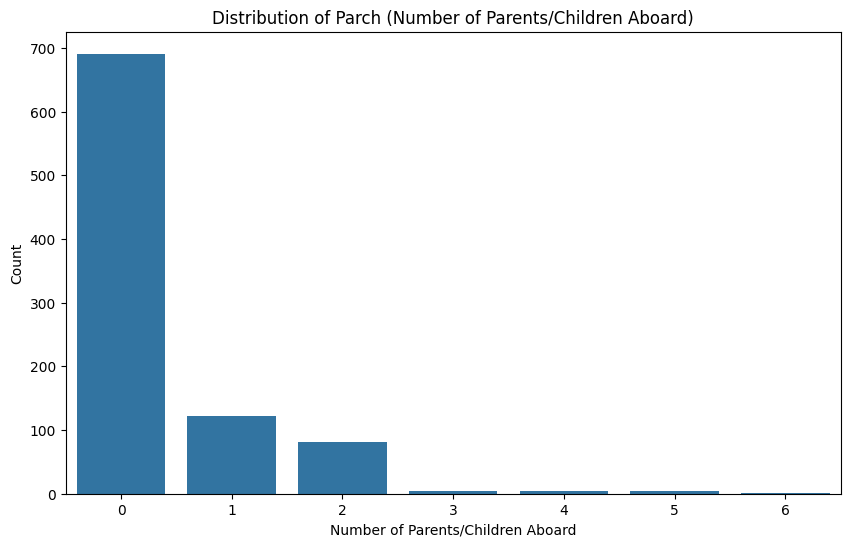

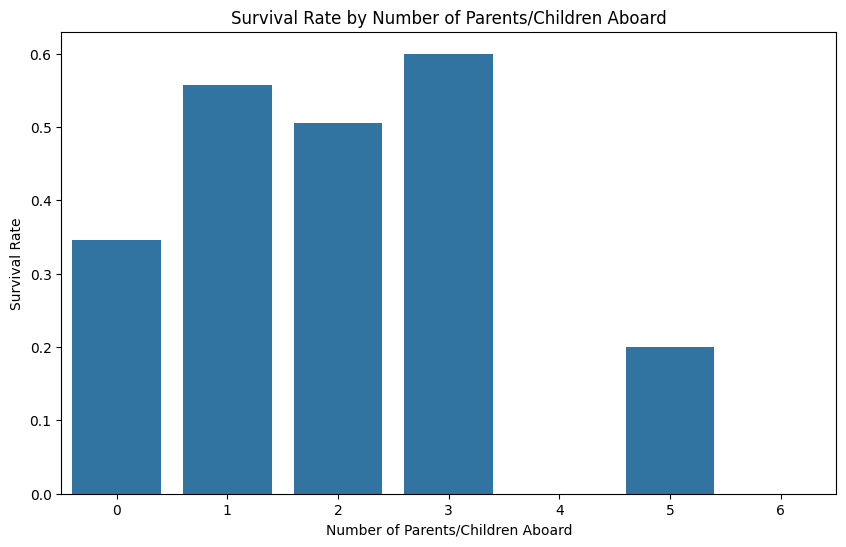

In [33]:


# 4. For the 'Parch' column:
# a. Create a count plot to visualize its distribution.
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', data=df)
plt.title('Distribution of Parch (Number of Parents/Children Aboard)')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()

# b. Create a bar plot to show the survival rate grouped by 'Parch'.
survival_rate_by_parch = df.groupby('Parch')['Survived'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Parch', y='Survived', data=survival_rate_by_parch)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.show()

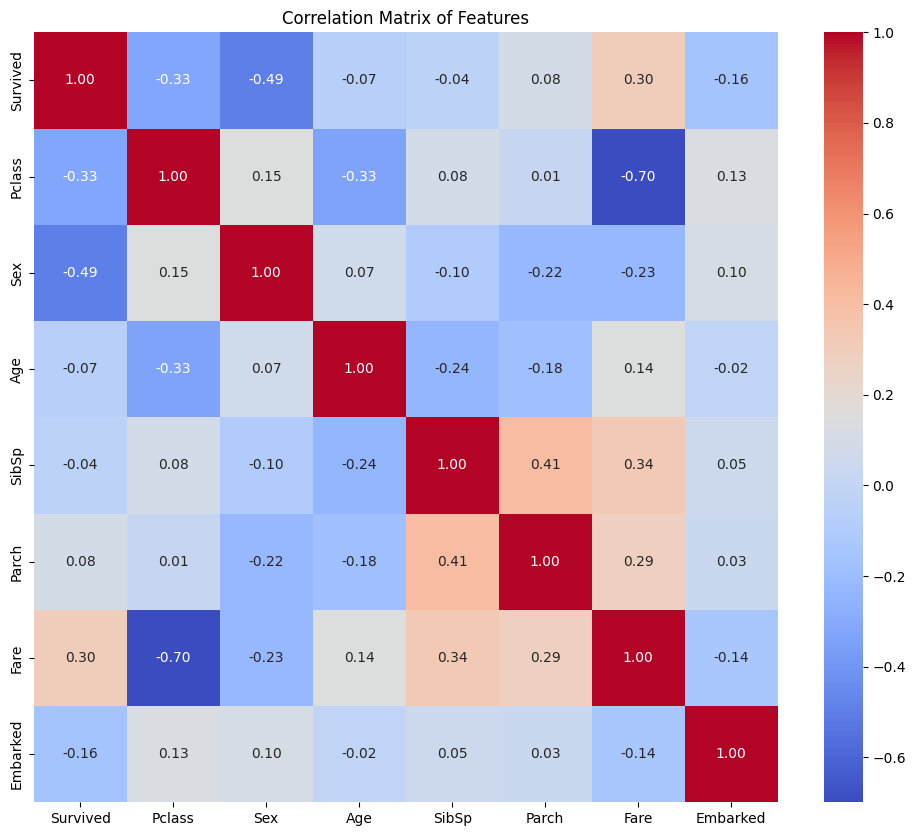

In [34]:


# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

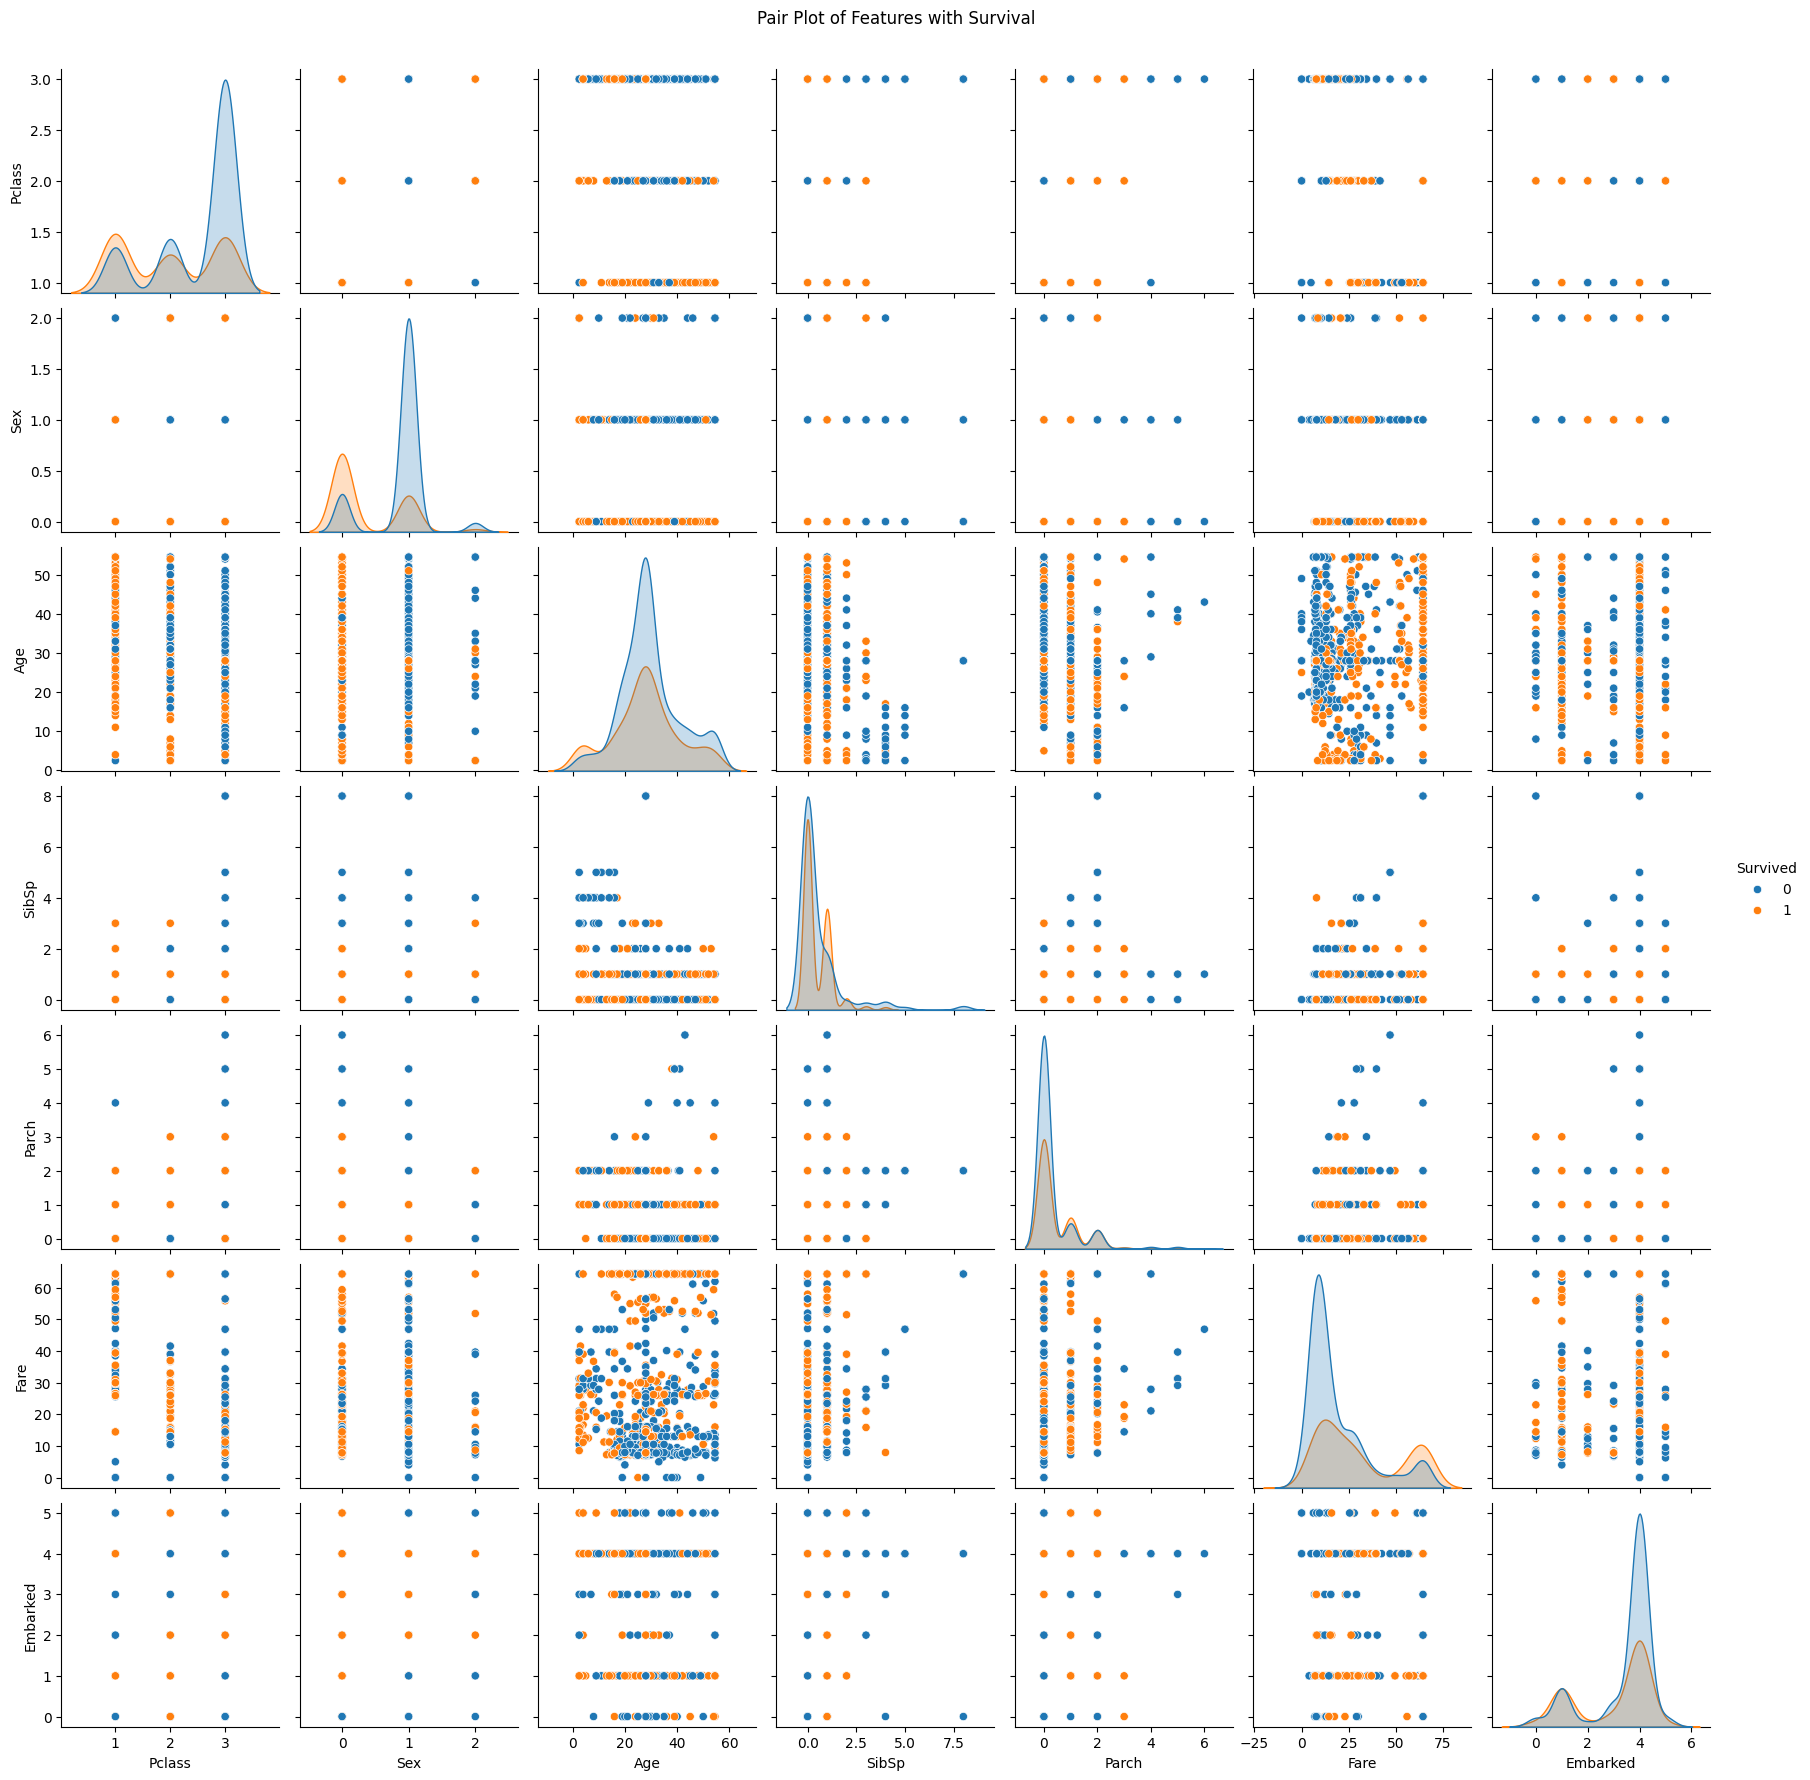

In [43]:


# Generate a pair plot to show multivariate relationships
# Using 'Survived' as hue to understand survival patterns across features
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.suptitle('Pair Plot of Features with Survival', y=1.02) # Adjust suptitle position
plt.show()

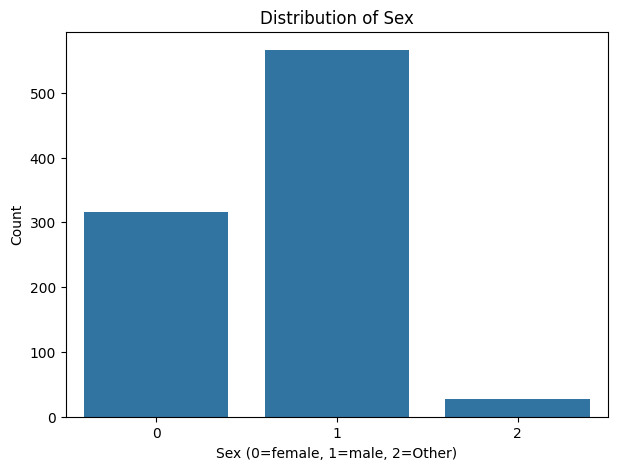

In [44]:


# 1. Generate a count plot to visualize the distribution of the 'Sex' column.
plt.figure(figsize=(7, 5))
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Sex')
plt.xlabel('Sex (0=female, 1=male, 2=Other)')
plt.ylabel('Count')
plt.show()

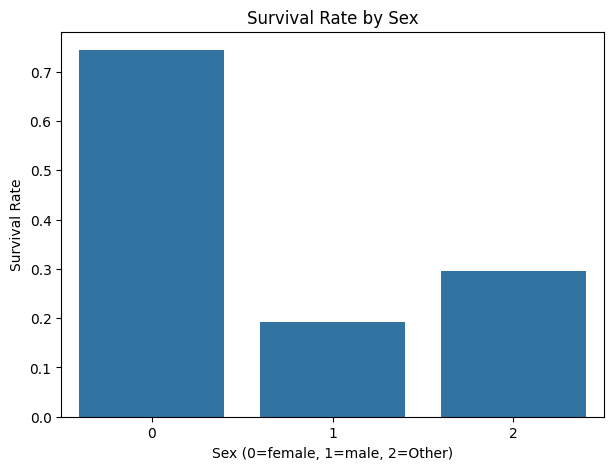

In [37]:


# 2. Calculate the survival rate by 'Sex' and create a bar plot to visualize this relationship.
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=survival_rate_by_sex)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0=female, 1=male, 2=Other)')
plt.ylabel('Survival Rate')
plt.show()

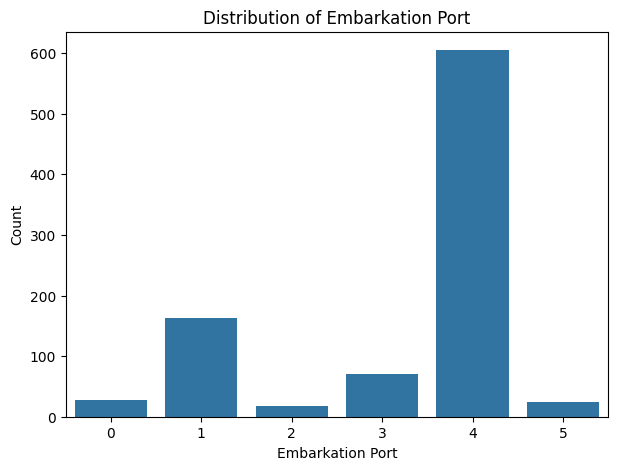

In [50]:


# 3. Generate a count plot to visualize the distribution of the 'Embarked' column.
plt.figure(figsize=(7, 5))
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

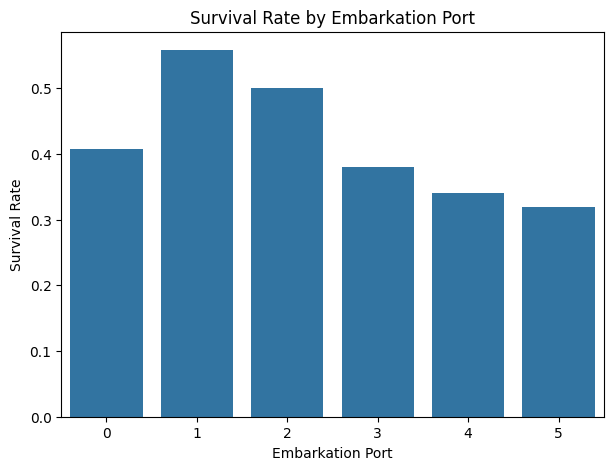

In [51]:


# 4. Calculate the survival rate by 'Embarked' and create a bar plot to visualize this relationship.
survival_rate_by_embarked = df.groupby('Embarked')['Survived'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Embarked', y='Survived', data=survival_rate_by_embarked)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

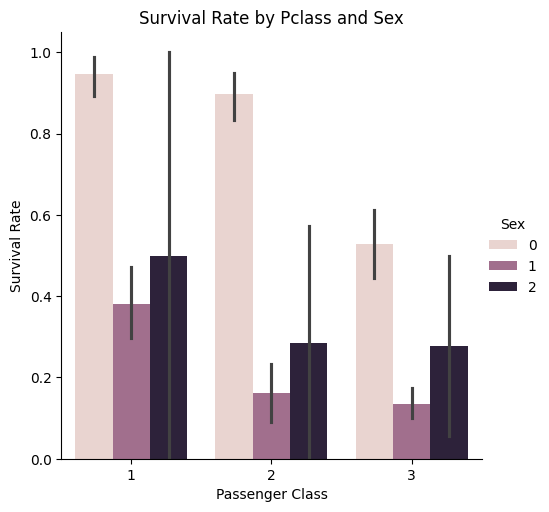

In [52]:


# 1. Visualize survival rate across 'Pclass' for different 'Sex' categories
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title('Survival Rate by Pclass and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

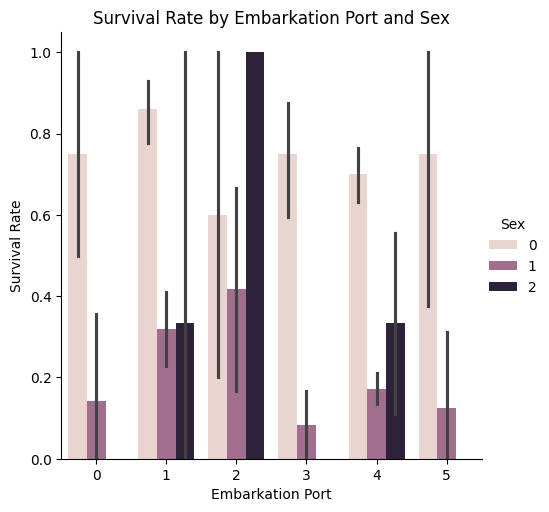

In [53]:


# 2. Visualize survival rate across 'Embarked' for different 'Sex' categories
sns.catplot(x='Embarked', y='Survived', hue='Sex', kind='bar', data=df)
plt.title('Survival Rate by Embarkation Port and Sex')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

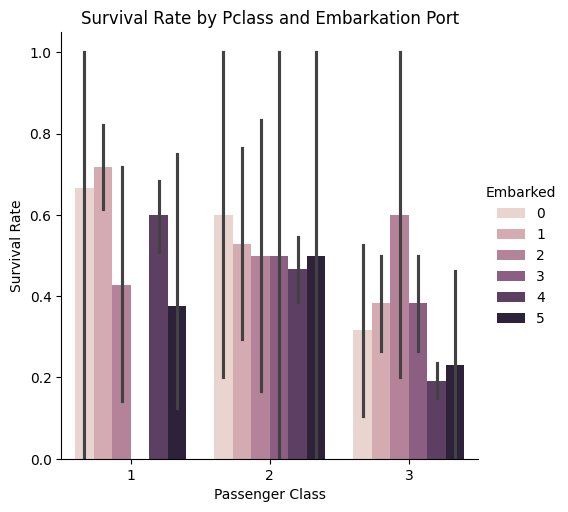

In [45]:


# 3. Create a third categorical plot to visualize the survival rate across 'Pclass' for different 'Embarked' categories.
sns.catplot(x='Pclass', y='Survived', hue='Embarked', kind='bar', data=df)
plt.title('Survival Rate by Pclass and Embarkation Port')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [54]:


# Separate features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (727, 7)
X_test shape: (182, 7)
y_train shape: (727,)
y_test shape: (182,)


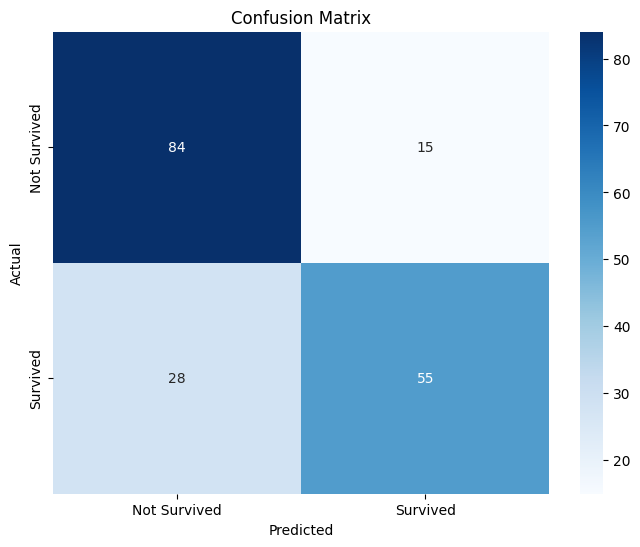

In [56]:


# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and handles L1/L2 regularization
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()